In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
group_1 = [
    'uv_eg', 'og', 'hauptluftung', 'gesamtmessung',
    'entsorgung', 'eg', 'xl106_druckmaschine'
    ]

### Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

#### Time Periodicies

30 minute aggregation:
 - Short term: 
    - uv_eg = [0.1255, 0.0628]
    - og = [0.1381, 0.0711]
    - hauptluftung = [0.1255, 0.0628]
    - gesamtmessung = [0.1255, 0.0628]
    - entsorgung = [0.1255, 0.0711]
    - eg = [0.1255, 0.0628]
    - xl106_druckmaschine = 
 - Long term: 
    - uv_eg = [0.2301, 0.1883]
    - og = [0.2301, 0.1967]
    - hauptluftung = [0.2301, 0.1883]
    - gesamtmessung = [0.2301, 0.1883]
    - entsorgung = [0.2176, 0.1967]
    - eg = [0.2301, 0.1883]
    - xl106_druckmaschine = 

10 minute aggregation:
 - Short term:
    - uv_eg = 
    - og =
    - hauptluftung = 
    - gesamtmessung = 
    - entsorgung = 
    - eg = 
    - xl106_druckmaschine = 
 - Long term: 
    - uv_eg = 
    - og =
    - hauptluftung = 
    - gesamtmessung = 
    - entsorgung = 
    - eg = 
    - xl106_druckmaschine = 

In [3]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.06, 0.12) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.16, 0.22) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 1.0055781356321012 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9652282225522456 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9259541358251858 , Noise = 0.5982087254524231
Iter 4 , Loss = 0.8865026221552806 , Noise = 0.5543562769889832
Iter 5 , Loss = 0.8477355952404535 , Noise = 0.5129053592681885
Iter 6 , Loss = 0.8097818114220776 , Noise = 0.47381719946861267
Iter 7 , Loss = 0.7722072829822594 , Noise = 0.43704745173454285
Iter 8 , Loss = 0.7353020785018392 , Noise = 0.4025442898273468
Iter 9 , Loss = 0.6994106854933846 , Noise = 0.37024956941604614
Iter 10 , Loss = 0.6641523622007731 , Noise = 0.34009984135627747
Iter 11 , Loss = 0.6295471351797562 , Noise = 0.3120254576206207
Iter 12 , Loss = 0.5961572910239229 , Noise = 0.28595104813575745
Iter 13 , Loss = 0.5637228242814626 , Noise = 0.26179805397987366
Iter 14 , Loss = 0.5322734246207123 , Noise = 0.2394840270280838
Iter 15 , Loss = 0.5023812289843694 , Noise = 0.2189234048128128
Iter 16 , Loss = 0.473582355

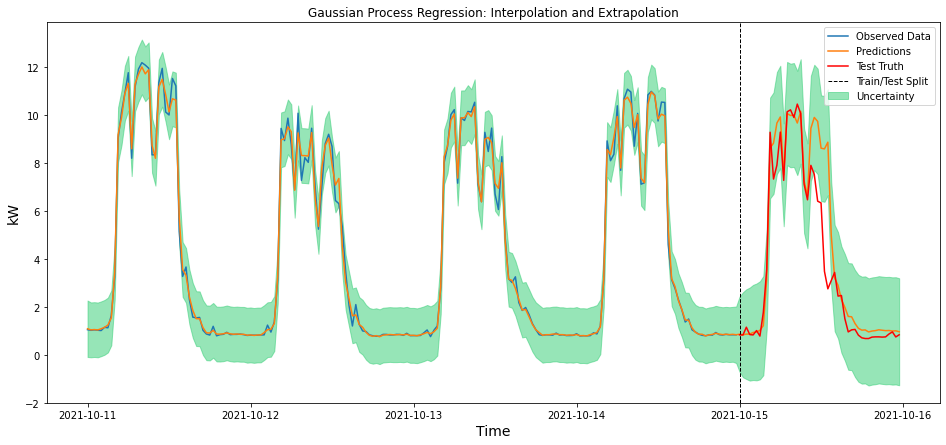

{}
Iter 1 , Loss = 0.9789993633148645 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.943118256025587 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9019832028596717 , Noise = 0.5982159972190857
Iter 4 , Loss = 0.8642276662465628 , Noise = 0.5543616414070129
Iter 5 , Loss = 0.8259667143162615 , Noise = 0.512904167175293
Iter 6 , Loss = 0.7847684849924356 , Noise = 0.47380518913269043
Iter 7 , Loss = 0.7431975293652382 , Noise = 0.43700969219207764
Iter 8 , Loss = 0.702993247865872 , Noise = 0.40245914459228516
Iter 9 , Loss = 0.6626847461997499 , Noise = 0.3700951635837555
Iter 10 , Loss = 0.6208395286763029 , Noise = 0.3398519456386566
Iter 11 , Loss = 0.5786150312772523 , Noise = 0.3116527199745178
Iter 12 , Loss = 0.5373983880846046 , Noise = 0.28541693091392517
Iter 13 , Loss = 0.4961800547286492 , Noise = 0.2610646188259125
Iter 14 , Loss = 0.45394560980831855 , Noise = 0.23851194977760315
Iter 15 , Loss = 0.41223537861830045 , Noise = 0.21766890585422516
Iter 16 , Loss = 0.3719889

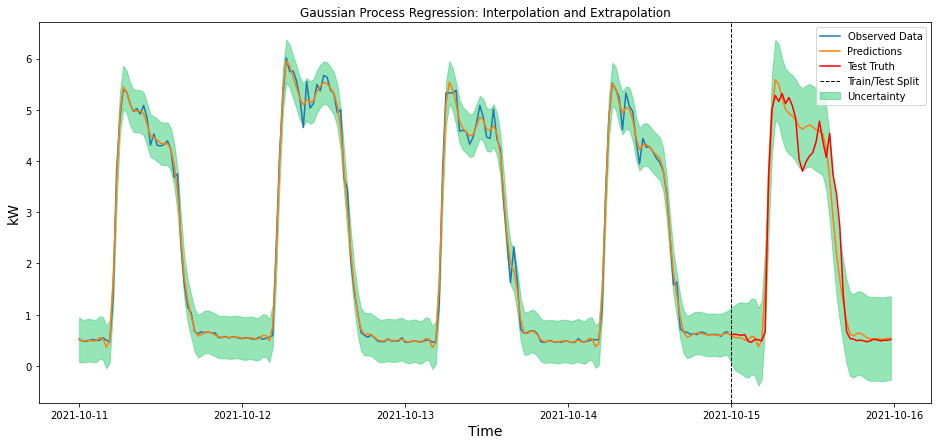

{Timestamp('2021-10-12 15:30:00'): 3.4583913959804358, Timestamp('2021-10-13 16:00:00'): 2.3266537760078156, Timestamp('2021-10-15 14:30:00'): 4.5394302325246025, Timestamp('2021-10-15 15:00:00'): 3.724666690130967, Timestamp('2021-10-15 15:30:00'): 3.3699825548172826, Timestamp('2021-10-15 16:00:00'): 2.717300966795156}
Iter 1 , Loss = 0.9344520706614391 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9050017415811773 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8708237197018991 , Noise = 0.5982382893562317
Iter 4 , Loss = 0.8399253087517701 , Noise = 0.5544280409812927
Iter 5 , Loss = 0.8092368222806666 , Noise = 0.5130429863929749
Iter 6 , Loss = 0.7773784447138726 , Noise = 0.47405022382736206
Iter 7 , Loss = 0.7465245444866085 , Noise = 0.43740126490592957
Iter 8 , Loss = 0.7174508848330982 , Noise = 0.4030452072620392
Iter 9 , Loss = 0.6882638362350967 , Noise = 0.370930016040802
Iter 10 , Loss = 0.6585058494217249 , Noise = 0.3409888446331024
Iter 11 , Loss = 0.6295242005074532

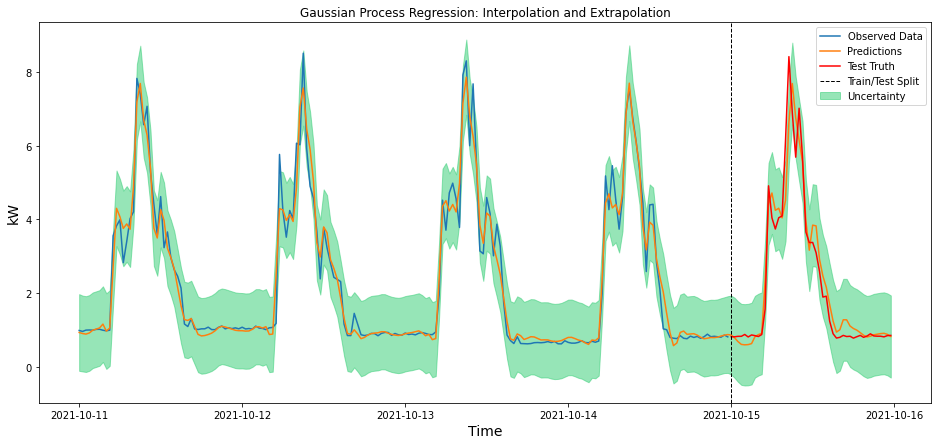

{Timestamp('2021-10-12 05:30:00'): 5.761022398848489, Timestamp('2021-10-12 08:00:00'): 6.065871480666222, Timestamp('2021-10-13 10:00:00'): 7.676323134249586, Timestamp('2021-10-14 06:30:00'): 5.455285893512255, Timestamp('2021-10-15 08:00:00'): 6.139552752116954, Timestamp('2021-10-15 08:30:00'): 8.415398922799543}
Iter 1 , Loss = 1.0013407541093713 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9675161219892776 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9324858901489508 , Noise = 0.5982204675674438
Iter 4 , Loss = 0.8991012739167045 , Noise = 0.5543856024742126
Iter 5 , Loss = 0.8666617018960094 , Noise = 0.5129611492156982
Iter 6 , Loss = 0.8330188156834751 , Noise = 0.4739098846912384
Iter 7 , Loss = 0.7984416596478049 , Noise = 0.4371805489063263
Iter 8 , Loss = 0.7637615766044838 , Noise = 0.4027141332626343
Iter 9 , Loss = 0.7287566899050791 , Noise = 0.3704489469528198
Iter 10 , Loss = 0.6932221424397546 , Noise = 0.3403177559375763
Iter 11 , Loss = 0.6580597481924166 , No

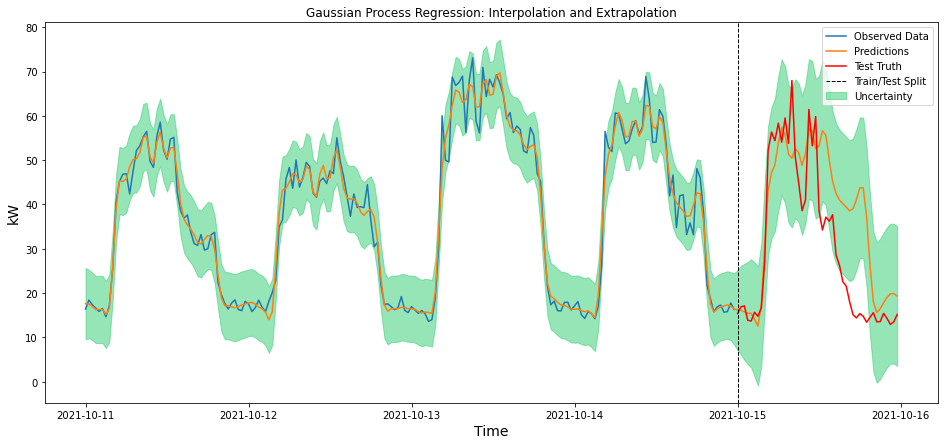

{Timestamp('2021-10-13 04:30:00'): 60.02493361340412, Timestamp('2021-10-14 04:30:00'): 56.487998194965606, Timestamp('2021-10-15 08:00:00'): 67.98935102352677}
Iter 1 , Loss = 0.9401862302969762 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9031757538568339 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8648209614971484 , Noise = 0.5982121229171753
Iter 4 , Loss = 0.8262564808675771 , Noise = 0.5543638467788696
Iter 5 , Loss = 0.7883714498680368 , Noise = 0.5129183530807495
Iter 6 , Loss = 0.7493332708154886 , Noise = 0.47383806109428406
Iter 7 , Loss = 0.7094561923585366 , Noise = 0.43707194924354553
Iter 8 , Loss = 0.6700464953818047 , Noise = 0.4025598466396332
Iter 9 , Loss = 0.631214658513667 , Noise = 0.37023842334747314
Iter 10 , Loss = 0.59178219332118 , Noise = 0.34004122018814087
Iter 11 , Loss = 0.5518399709862619 , Noise = 0.3118944764137268
Iter 12 , Loss = 0.512554215025434 , Noise = 0.2857186496257782
Iter 13 , Loss = 0.4742526760720122 , Noise = 0.26143231987953186
It

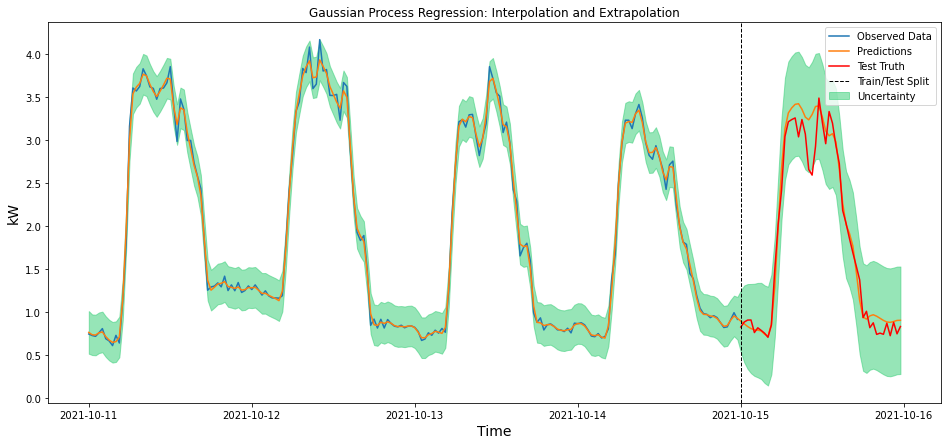

{}
Iter 1 , Loss = 0.9124668027916231 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8793272502359876 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8412053902562694 , Noise = 0.5982230305671692
Iter 4 , Loss = 0.805798234920775 , Noise = 0.554388701915741
Iter 5 , Loss = 0.7706315777133125 , Noise = 0.5129647850990295
Iter 6 , Loss = 0.7338791190667443 , Noise = 0.47391363978385925
Iter 7 , Loss = 0.6974538858201046 , Noise = 0.43718403577804565
Iter 8 , Loss = 0.6624130365631351 , Noise = 0.40272071957588196
Iter 9 , Loss = 0.6276888694276171 , Noise = 0.3704661428928375
Iter 10 , Loss = 0.5925250446669629 , Noise = 0.3403542935848236
Iter 11 , Loss = 0.5577796413395386 , Noise = 0.3123088777065277
Iter 12 , Loss = 0.524384422056637 , Noise = 0.28624871373176575
Iter 13 , Loss = 0.4916676387627578 , Noise = 0.2620917558670044
Iter 14 , Loss = 0.4587974431372929 , Noise = 0.23975282907485962
Iter 15 , Loss = 0.42670187768561824 , Noise = 0.21914181113243103
Iter 16 , Loss = 0.39603952

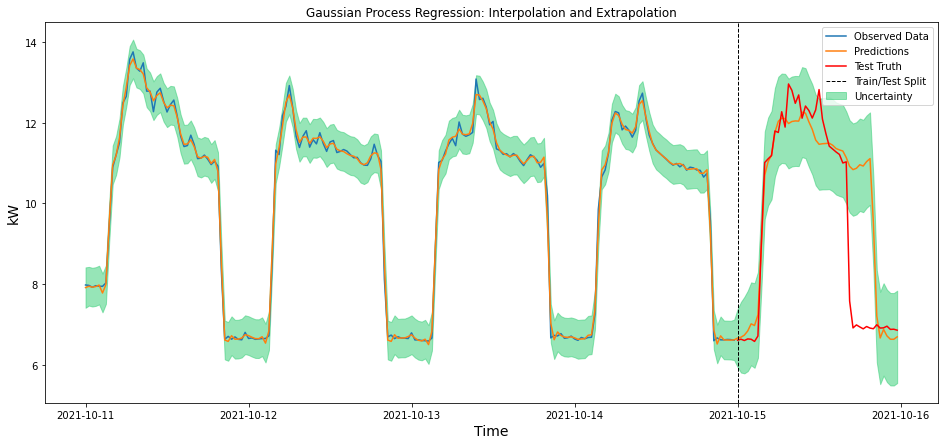

{Timestamp('2021-10-13 20:00:00'): 10.204072062890976, Timestamp('2021-10-15 12:00:00'): 12.819344963739526}
Iter 1 , Loss = 1.095751823575812 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0651804763178128 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0352377277905358 , Noise = 0.598224401473999
Iter 4 , Loss = 1.005229913456254 , Noise = 0.5544052124023438
Iter 5 , Loss = 0.9759739235683673 , Noise = 0.5130034685134888
Iter 6 , Loss = 0.9474488398432045 , Noise = 0.47398144006729126
Iter 7 , Loss = 0.9193821173228143 , Noise = 0.4372967481613159
Iter 8 , Loss = 0.8919864741490168 , Noise = 0.4029031991958618
Iter 9 , Loss = 0.8645132153271335 , Noise = 0.3707556128501892
Iter 10 , Loss = 0.8378772258781498 , Noise = 0.34080061316490173
Iter 11 , Loss = 0.8132517759602544 , Noise = 0.31298044323921204
Iter 12 , Loss = 0.7908508517279303 , Noise = 0.2872384488582611
Iter 13 , Loss = 0.7701355061621484 , Noise = 0.2635151147842407
Iter 14 , Loss = 0.7513843440898261 , Noise = 0.2417411

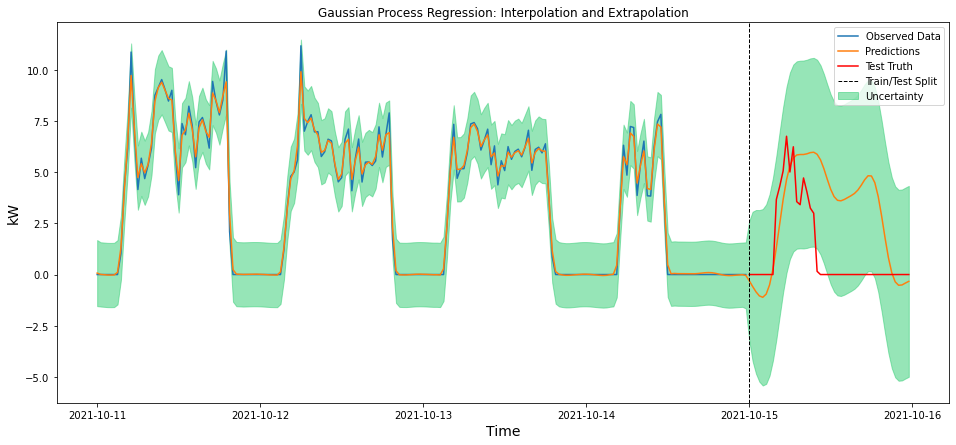

{}


In [6]:
for machine in group_1:
    X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(machine+'_30T', 30, True)

    model, likelihood, mse, mape, perf_dev = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine=machine,
    update_score=True
    )   
